# LINEAR REGRESSION L3

In [26]:



import numpy as np 
import pandas as pd 
import scipy as sp
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import matplotlib.axes as ax
import os

data = pd.read_csv('C:\\Users\\kriti\\Downloads\\datasets\\train.csv')

data.head(10)

,x,y
0,24.0,21.549452
1,50.0,47.464463
2,15.0,17.218656
3,38.0,36.586398
4,87.0,87.288984
5,36.0,32.463875
6,12.0,10.780897
7,81.0,80.763399
8,25.0,24.612151
9,5.0,6.963319


In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       700 non-null    float64
 1   y       699 non-null    float64
dtypes: float64(2)
memory usage: 11.1 KB


# LINEAR REGRESSION L4

In [28]:
#data processing
#handling null values
data=data.dropna(axis=0)

In [29]:
data.shape

(699, 2)

In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 699 entries, 0 to 699
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       699 non-null    float64
 1   y       699 non-null    float64
dtypes: float64(2)
memory usage: 16.4 KB


In [31]:
#splitting data first 100 to input

In [32]:
train_input=np.array(data.x[0:500]).reshape(500,1)
train_output=np.array(data.y[0:500]).reshape(500,1)

test_input=np.array(data.x[500:700]).reshape(199,1)
test_output=np.array(data.y[500:700]).reshape(199,1)

In [33]:
train_input.shape

(500, 1)

In [34]:
test_input.shape

(199, 1)

In [35]:
train_output.shape

(500, 1)

In [36]:
test_output.shape

(199, 1)

# LINEAR REGRESSION L5

### DEFINING COST FUNCTION

#### MEAN SQUARED ERROR, COST=[(y-f(x))^2]*2n

##### where y are the actual or true values and f(x) are the predicted values

In [37]:
def cost_function(predictions, train_output):
    cost=np.mean((predictions-train_output**2))*0.5
    return cost

## GRADIENT DESCENT FOR BACKPROPAGATION L6

In [38]:
def backward_propagation(train_input,train_output,predictions):
    derivatives=dict()
    df=predictions-test_output
    dm=np.mean(np.multiply(df,train_input))
    dc=np.mean(df)
    
    derivatives['dm']=dm
    derivatives['dc']=dc
    return derivatives

# UPDATING THE PARAMETERS L7

In [39]:
#m=m-(learning_rate*dm)
#c=c-(learning_rate*dc)

In [40]:
def update_parameters(parameters,derivatives,learning_rate):
    parameters['m']=parameters['m']-learning_rate*derivatives['dm']
    parameters['c']=parameters['m']-learning_rate*derivatives['dc']
    
    return parameters

### TRAINING

In [41]:
import numpy as np
import matplotlib.pyplot as plt

def train(train_input, train_output, learning_rate, iters):
    parameters = dict()
    parameters["m"] = np.random.uniform(0, 1) * -1
    parameters["c"] = np.random.uniform(0, 1) * -1
    loss = []

    for i in range(iters):
        predictions = forward_propagation(train_input, parameters)
        cost = cost_function(predictions, train_output)
        loss.append(cost)

        if i % 100 == 0:
            print(f"Iteration {i}: Loss = {cost:.4f}")

        derivatives = backward_propagation(train_input, train_output, predictions)
        parameters = update_parameters(parameters, derivatives, learning_rate)

    print("Training completed!")

    # Final parameters
    print("Final Parameters:")
    print("m =", parameters["m"])
    print("c =", parameters["c"])

    # Plot the loss curve after training
    plt.figure()
    plt.plot(loss)
    plt.xlabel('Iterations')
    plt.ylabel('Loss')
    plt.title('Loss Curve during Training')
    plt.show()

def forward_propagation(train_input, parameters):
    # Implement the forward propagation logic here
    # Calculate the predicted values (predictions) using the linear regression equation
    # y_pred = parameters["m"] * train_input + parameters["c"]
    pass

def cost_function(predictions, train_output):
    # Implement the cost function here (e.g., Mean Squared Error or Mean Absolute Error)
    pass

def backward_propagation(train_input, train_output, predictions):
    # Implement the backward propagation to calculate derivatives here
    pass

def update_parameters(parameters, derivatives, learning_rate):
    # Implement the update step to adjust parameters using derivatives and learning rate
    pass


# 8 LINEAR REGRESSION USING SKLEARN 

In [42]:
#IMPORTING LIBRARIES

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [44]:
data = pd.read_csv('C:\\Users\\kriti\\Downloads\\datasets\\train.csv')

In [45]:
data.head(10)

,x,y
0,24.0,21.549452
1,50.0,47.464463
2,15.0,17.218656
3,38.0,36.586398
4,87.0,87.288984
5,36.0,32.463875
6,12.0,10.780897
7,81.0,80.763399
8,25.0,24.612151
9,5.0,6.963319


In [46]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       700 non-null    float64
 1   y       699 non-null    float64
dtypes: float64(2)
memory usage: 11.1 KB


In [47]:
#DATA PREPROCESSING

In [48]:
data=data.dropna()  #deleting null value in y

In [49]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 699 entries, 0 to 699
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       699 non-null    float64
 1   y       699 non-null    float64
dtypes: float64(2)
memory usage: 16.4 KB


In [50]:
data.shape

(699, 2)

In [51]:
#splitting data

In [52]:
train_input = np.array(data.x[0:500]).reshape(500, 1)
# Converting data.x to a NumPy array, selecting the first 500 rows, and reshaping into a column vector

train_output = np.array(data.y[0:500]).reshape(500, 1)
# Converting data.y to a NumPy array, selecting the corresponding 500 rows, and reshaping into a column vector

test_input = np.array(data.x[500:700]).reshape(199, 1)
# Converting data.x to a NumPy array, selecting rows 500 to 699, and reshaping into a column vector

test_output = np.array(data.y[500:700]).reshape(199, 1)
# Converting data.y to a NumPy array, selecting the corresponding 200 rows, and reshaping into a column vector


In [53]:
train_input.shape

(500, 1)

# LINEAR REGRESSION

In [54]:
#TRAINING MODEL

In [55]:
from sklearn.linear_model import LinearRegression

linear_regressor = LinearRegression()
linear_regressor.fit(train_input, train_output)


LinearRegression()

In [56]:
linear_regressor
# Using the fit method to train the linear regression model

LinearRegression()

In [57]:
#predicting test_input

In [58]:
#feeding testing input

predicted_value=linear_regressor.predict(test_input)

In [59]:
predicted_value

array([[ 4.76896187],
       [60.82492252],
       [46.81093236],
       [97.86189652],
       [29.7939443 ],
       [62.82692111],
       [-0.23603461],
       [99.86389511],
       [17.78195274],
       [29.7939443 ],
       [97.86189652],
       [15.77995414],
       [21.78594992],
       [54.81892673],
       [42.80693517],
       [74.83891268],
       [90.85490143],
       [45.80993306],
       [84.84890565],
       [54.81892673],
       [35.79994009],
       [48.81293095],
       [93.85789933],
       [42.80693517],
       [21.78594992],
       [36.80093938],
       [23.78794852],
       [94.85889862],
       [60.82492252],
       [74.83891268],
       [67.8319176 ],
       [57.82192463],
       [ 4.76896187],
       [52.81692814],
       [79.84390916],
       [82.84690706],
       [24.78894782],
       [33.79794149],
       [25.78994711],
       [89.85390214],
       [59.82392322],
       [48.81293095],
       [18.78295203],
       [91.85590073],
       [28.79294501],
       [ 7

In [60]:
test_output

array([[  7.68202459],
       [ 61.01858089],
       [ 53.60562216],
       [ 94.47728801],
       [ 27.9645947 ],
       [ 62.55662585],
       [  1.40625441],
       [101.7003412 ],
       [ 13.84973988],
       [ 28.99769315],
       [ 99.04315693],
       [ 15.56135514],
       [ 24.63528393],
       [ 53.98393374],
       [ 42.91449728],
       [ 74.29662112],
       [ 91.17012883],
       [ 49.42440876],
       [ 82.47683519],
       [ 56.15303953],
       [ 37.17063131],
       [ 46.36928662],
       [ 97.02383456],
       [ 40.83182104],
       [ 24.08498313],
       [ 41.14386358],
       [ 21.97388066],
       [100.740897  ],
       [ 61.19971596],
       [ 74.39517002],
       [ 69.04377173],
       [ 56.68718792],
       [  5.86039171],
       [ 55.72021356],
       [ 79.22021816],
       [ 86.30177517],
       [ 25.26971886],
       [ 36.33294447],
       [ 27.65574228],
       [ 94.79690531],
       [ 58.67366671],
       [ 56.15934471],
       [ 18.40919388],
       [ 86

In [61]:
#for checking performance of model we use sklearn lib

In [62]:
from sklearn.metrics import mean_squared_error
error=mean_squared_error(test_output,predicted_value)

In [63]:
error
# 92 percent correct

8.030031591835371

In [64]:
#visualising the model performance

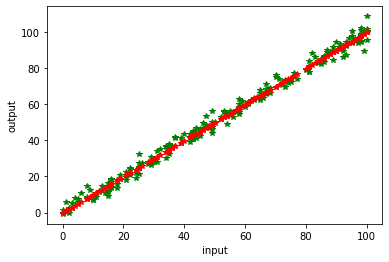

In [81]:
#original hypothesis
plt.plot(test_input,test_output,"*",color="green")

#model hypothesis

plt.plot(test_input,predicted_value,"*",color="red")

plt.xlabel('input')
plt.ylabel('output')
plt.show()

# Polynomial Regression

In [94]:
#importing library

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.axes as ax

In [95]:
data = pd.read_csv('C:\\Users\\kriti\\Downloads\\datasets\\train.csv')

In [96]:
data.head(10)

,x,y
0,24.0,21.549452
1,50.0,47.464463
2,15.0,17.218656
3,38.0,36.586398
4,87.0,87.288984
5,36.0,32.463875
6,12.0,10.780897
7,81.0,80.763399
8,25.0,24.612151
9,5.0,6.963319


In [97]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       700 non-null    float64
 1   y       699 non-null    float64
dtypes: float64(2)
memory usage: 11.1 KB


In [98]:
#DATA PROCESSING

In [99]:
data=data.dropna()  #deleting null value in y

In [100]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 699 entries, 0 to 699
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       699 non-null    float64
 1   y       699 non-null    float64
dtypes: float64(2)
memory usage: 16.4 KB


In [101]:
#splitting data
train_input = np.array(data.x[0:500]).reshape(500, 1)
# Converting data.x to a NumPy array, selecting the first 500 rows, and reshaping into a column vector

train_output = np.array(data.y[0:500]).reshape(500, 1)
# Converting data.y to a NumPy array, selecting the corresponding 500 rows, and reshaping into a column vector

test_input = np.array(data.x[500:700]).reshape(199, 1)
# Converting data.x to a NumPy array, selecting rows 500 to 699, and reshaping into a column vector

test_output = np.array(data.y[500:700]).reshape(199, 1)
# Converting data.y to a NumPy array, selecting the corresponding 200 rows, and reshaping into a column vector

#print the shapes


print("Train Input Shape=()".format(train_output.shape) )
print("Train output Shape=()".format(train_output.shape) )
print("Train Input Shape=()".format(train_input.shape) )
print("Train Input Shape=()".format(train_output.shape) )

Train Input Shape=()
Train output Shape=()
Train Input Shape=()
Train Input Shape=()


In [102]:
#Training model

In [104]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

poly_regressor=PolynomialFeatures(degree=2)
#has fn (theta1+theta2)+(theta1=theta2)^2
train_input_poly=poly_regressor.fit_transform(train_input)

poly_regressor.fit(train_input,train_output)

PolynomialFeatures()

In [106]:
train_input_poly

array([[1.000e+00, 2.400e+01, 5.760e+02],
       [1.000e+00, 5.000e+01, 2.500e+03],
       [1.000e+00, 1.500e+01, 2.250e+02],
       ...,
       [1.000e+00, 2.100e+01, 4.410e+02],
       [1.000e+00, 8.100e+01, 6.561e+03],
       [1.000e+00, 9.700e+01, 9.409e+03]])

In [107]:
linear_regression=LinearRegression()
linear_regressor.fit(train_input_poly,train_output)

LinearRegression()

In [108]:
#predicting Test_input

In [109]:
predicted_value=linear_regressor.predict(poly_regressor.fit_transform(test_input))

In [111]:
from sklearn.metrics import mean_squared_error
error=mean_squared_error(predicted_value,test_output)

In [112]:
error

8.063337564451189

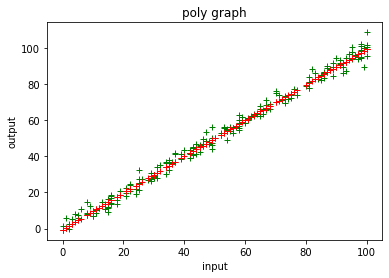

In [113]:
#visualising the model performance

plt.plot(test_input,test_output,'+',color="green")
plt.plot(test_input,predicted_value,'+',color="red")
plt.title("poly graph")
plt.xlabel("input")
plt.ylabel("output")
plt.show()

In [2]:
#edurekha

%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt




In [3]:
#reading data
data = pd.read_csv('C:\\Users\\kriti\\Downloads\\datasets\\train.csv')
data.head(10)

,x,y
0,24.0,21.549452
1,50.0,47.464463
2,15.0,17.218656
3,38.0,36.586398
4,87.0,87.288984
5,36.0,32.463875
6,12.0,10.780897
7,81.0,80.763399
8,25.0,24.612151
9,5.0,6.963319


In [4]:
data=data.dropna()

In [5]:
#collecting x and y
x=data['x'].values
y=data['y'].values

In [6]:
#calculating mean

mean_x=np.mean(x)
mean_y=np.mean(y)

In [7]:
#total number of values

m=len(x)

In [13]:
#calculating b1 and b0 representing m and c

# Assuming you have two lists, x and y, containing the data points
# and len(x) == len(y) (the number of data points)

m = len(x)
x_mean = sum(x) / m
y_mean = sum(y) / m

numer = 0
denom = 0

for i in range(m):
    numer += (x[i] - x_mean) * (y[i] - y_mean)
    denom += (x[i] - x_mean) ** 2

b1 = numer / denom
b0 = y_mean - (b1 * x_mean)

print("b1 (slope):", b1)
print("b0 (intercept):", b0)


b1 (slope): 1.0006563818563046
b0 (intercept): -0.10726546430105088


In [68]:
# Assuming you have already calculated the values for b0, b1, x, y, and mean_y as given in the previous code.

ss_t = 0
ss_r = 0

for i in range(m):
    y_pred = b0 + b1 * x[i]
    ss_t += (y[i] - mean_y) ** 2
    ss_r += (y[i] - y_pred) ** 2

r_squared = 1 - (ss_r / ss_t)

print("R-squared (R2):", r_squared)


R-squared (R2): 0.9907015319025518


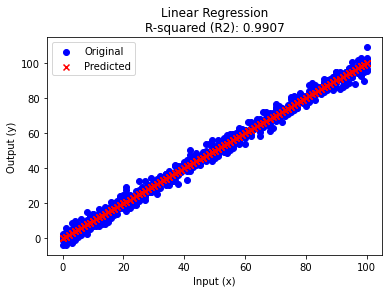

In [77]:
# Plotting the original and predicted values
import numpy as np
import matplotlib.pyplot as plt
plt.scatter(x, y, label='Original', marker='o', color='blue')
plt.scatter(x, y_pred, label='Predicted', marker='x', color='red')
plt.xlabel('Input (x)')
plt.ylabel('Output (y)')
plt.title(f'Linear Regression\nR-squared (R2): {r_squared:.4f}')
plt.legend()
plt.show()

In [75]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

x = x.reshape((m, 1))

# Creating the model
reg = LinearRegression()

# Fitting training data
reg = reg.fit(x, y)

# Y prediction
y_pred = reg.predict(x)

print("Slope (Coefficient):", reg.coef_[0])
print("Intercept:", reg.intercept_)
# Calculating R-squared score
r2_score = r2_score(y, y_pred)
print("R-squared (R2) Score:", r2_score)


Slope (Coefficient): 1.000656381856304
Intercept: -0.10726546430097272
R-squared (R2) Score: 0.9907015319025518


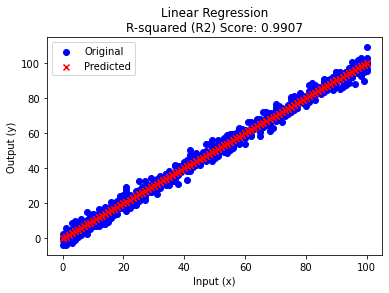

In [76]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
# Plotting the original and predicted values
plt.scatter(x, y, label='Original', marker='o', color='blue')
plt.scatter(x, y_pred, label='Predicted', marker='x', color='red')
plt.xlabel('Input (x)')
plt.ylabel('Output (y)')
plt.title(f'Linear Regression\nR-squared (R2) Score: {r2:.4f}')
plt.legend()
plt.show()

# SUPPORT VECTOR MACHINE l11

steps



. get training data set

. plot data to a high dimensional spaces

. evaluate the kernek

. find the best hyperplane

. target is to plot non-linearly separable data to a high dimension
space and the make it to a linear separable(separate two data with linear line)

# SUPPORT VECTOR 2 KERNEL L12

what is a KERNAL?

. Kernal is a method of using a linear classifier to solve a non linear problem

.It transforms a linearly inseperable data to linearly separable data

.the kernel function is what applied on which each data instance to map the original non-linear observations into a higher dimensional space in which they become separable


TYPES OF KERNEL-

. GAUSSIAN

.SIGMOID

.POLYNOMIAL



# SUPPORT VECTOR REGRESSION L13

In [88]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.axes as ax

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.svm import SVR
from sklearn.metrics import accuracy_score

In [89]:
#loading data
from sklearn.datasets import load_boston
boston_data=load_boston()

In [90]:
boston_data

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

In [91]:
boston_data.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [129]:
data=pd.DataFrame(boston_data.data,columns=boston_data.feature_names)

In [93]:
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [94]:
data['MEDV']=boston_data.target
#combine data
#medv ..output parameter rest input

In [95]:
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [96]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [97]:
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [98]:
#data processing

In [99]:
data.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [100]:
#splitting data

In [101]:
x=data.drop(['MEDV'],axis=1)
y=data['MEDV']

In [102]:
#input data....different ranges do data scaling
x.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [103]:
#output
y.head()

0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
Name: MEDV, dtype: float64

In [104]:
sc_x=StandardScaler()
x=sc_x.fit_transform(x)
#scaling data

In [105]:
x

array([[-0.41978194,  0.28482986, -1.2879095 , ..., -1.45900038,
         0.44105193, -1.0755623 ],
       [-0.41733926, -0.48772236, -0.59338101, ..., -0.30309415,
         0.44105193, -0.49243937],
       [-0.41734159, -0.48772236, -0.59338101, ..., -0.30309415,
         0.39642699, -1.2087274 ],
       ...,
       [-0.41344658, -0.48772236,  0.11573841, ...,  1.17646583,
         0.44105193, -0.98304761],
       [-0.40776407, -0.48772236,  0.11573841, ...,  1.17646583,
         0.4032249 , -0.86530163],
       [-0.41500016, -0.48772236,  0.11573841, ...,  1.17646583,
         0.44105193, -0.66905833]])

In [116]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=0)

In [117]:
xtrain.shape

(404, 13)

In [118]:
xtest.shape

(102, 13)

In [119]:
ytrain.shape

(404,)

In [120]:
ytest.shape

(102,)

In [121]:
#support vector regression

In [122]:
#train model

In [124]:
svr = SVR(kernel='rbf')
svr.fit(xtrain, ytrain)


SVR()

In [75]:
#PREDICTION

In [76]:
ypred=svr.predict(xtest)


In [44]:
ypred

array([25.22358748, 19.06583511, 24.60602143, 13.26290584, 21.08311784,
       19.4441435 , 20.82405195, 20.16144685, 19.09662122, 19.15619069,
       20.72465108, 13.11853024, 14.80613771, 12.8250854 , 27.32457984,
       30.44801588, 21.37889732, 31.79435746, 28.91192325, 21.48778293,
       23.83270726, 21.71204954, 18.89976629, 27.96295303, 20.64002657,
       18.04483988, 17.14769644, 18.64147916, 34.00420733, 18.6096865 ,
       15.28352779, 17.32422712, 19.71118576, 21.46541   , 25.95181278,
       20.9125114 , 11.92397274, 22.34681399, 13.99033204, 13.29347589,
       23.69516929, 20.39342135, 23.11092006, 15.05872982, 25.33860609,
       23.40951891, 19.2958082 , 20.96045722, 16.75525742, 22.97858214,
       20.81610077, 19.82181   , 21.52744214, 29.74596611, 15.34329489,
       21.34193848, 20.12844596, 18.66020832, 19.29919392, 21.62274874,
       20.99157874, 20.98785795, 31.69004093, 28.28900221, 18.38858256,
       29.99483536, 16.14845879, 20.30133354, 13.79337986, 22.05

In [46]:
ytest.head()

329    22.6
371    50.0
219    23.0
403     8.3
78     21.2
Name: MEDV, dtype: float64

In [ ]:
#error

In [47]:
error=mean_squared_error(ypred,ytest)

In [48]:
error

40.98054861496634

# ML DESICION TREE INTITUTIONL14-15

WORKING

.ENTROPY

.GINI INDEX

.SPLIT

In [126]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.axes as ax

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor

In [127]:
#loading data
from sklearn.datasets import load_boston
boston_data=load_boston()

In [128]:
boston_data

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

In [130]:
data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [133]:
data=pd.DataFrame(boston_data.data,columns=boston_data.feature_names)

In [135]:
data['MEDV']=boston_data.target
#combine data
#medv ..output parameter rest input

In [136]:
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [137]:
#Little bit of exploreation

In [138]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [139]:
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [141]:
#data processing
#checking null values

In [142]:
print(data.isnull().sum())

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64


In [143]:
#splitting data
x=data.drop(['MEDV'],axis=1)
y=data['MEDV']

In [144]:
x.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [145]:
y.head()

0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
Name: MEDV, dtype: float64

In [147]:
from sklearn.preprocessing import StandardScaler

sc_x=StandardScaler()
x=sc_x.fit_transform(x)
#scaling data

In [164]:
#splitting data and training
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.50,random_state=101)

In [165]:
#print the shapes
print("train input shape=()".format(xtrain.shape))

print("train input shape=()".format(ytrain.shape))

print("train input shape=()".format(xtest.shape))

print("train input shape=()".format(ytest.shape))

train input shape=()
train input shape=()
train input shape=()
train input shape=()


In [166]:
#decision tree regression

Training Model

In [167]:
dtr=DecisionTreeRegressor()
dtr.fit(xtrain,ytrain)

DecisionTreeRegressor()

In [168]:
#Prediction
ypred=dtr.predict(xtest)

In [169]:
ypred

array([48.5, 33.4, 11.7, 13.4, 30.1, 33.4, 41.7, 19. , 37. ,  7.4, 22.6,
       17.4, 17.4, 19.4, 21.2, 50. ,  7.5, 28. , 30.1, 23. ,  8.5, 23.1,
       20.1, 37. , 36.4, 22. , 26.7, 12.5, 50. , 33.3, 22. , 19.6, 36.4,
       45.4, 33.8, 23.1, 16.4, 18.4,  7.5, 28.4, 21.1, 22.2, 38.7,  8.3,
       21.8, 30.1, 23.6, 12.5, 23.3, 33.1, 33.8, 41.7, 19.6, 20.8, 23.6,
       13.8, 18.3, 16.6, 22.5, 17.7, 34.9,  8.1, 23.3, 22.2,  9.5, 26.5,
       24.4, 19.4, 17.2, 19.6, 19.3, 22.2, 13.8, 21.7, 28.7, 15.3, 23.9,
       19.7, 24. , 12.3, 15.2, 19.6, 31.5, 12.1, 27.1, 21.2, 21.7, 24.8,
       21. , 23. , 12.3, 13.4, 23. , 36.5,  5.6, 39.8,  8.1, 33.8, 12.3,
       22. , 33.8, 20.4, 24.8, 24.4, 20.2, 22.6, 23. , 34.9, 41.7, 30.1,
       20.3, 41.7, 24.6, 21. , 32.2, 23.6, 21.9, 29.8, 21.5, 22.6, 13.3,
       20. , 19.4, 32. , 21.9, 21.4, 17.7,  5.6, 15.4, 19.7, 24.4, 36.4,
       22.2, 21.2, 25. , 22.7, 30.1, 26.2, 37.6, 21. , 11.7, 48.5, 33.4,
       19.1, 24.4, 21. , 21. , 24.4, 22.6, 24.8, 16

In [170]:
mean_squared_error(ypred,ytest)

21.19830039525692

# RANDOM FOREST L16-17

ENSEMBLE-COMBINING MULTIPLE MODULES
COMBINING ONE MODEL MUMTIPLE TIMES

N DECISION TREE COMBINED TOGETHER
N PREDICTIONS FROM N TREES
RESULT=AVERAGE OF N PREDICTIONS